                         Y  |
                            |  * * * *
                            | *
                            |*
                            |___________ X    Training data
                            



 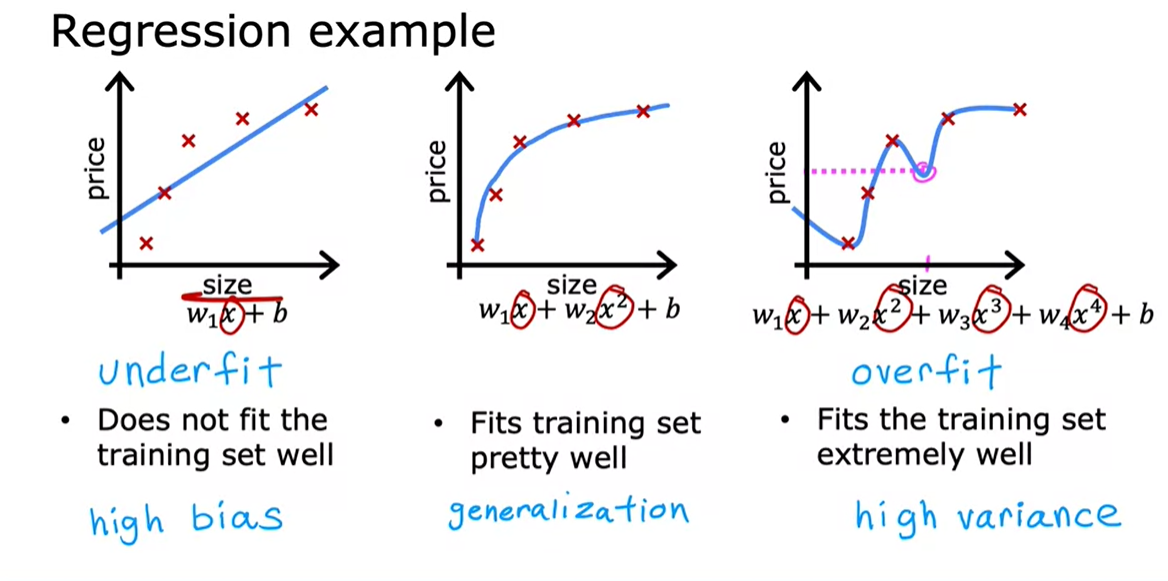                       

### Underfitting:

    Models performs really bad for training data. Leads to high biased model i.e, the model makes more assumptions/preconcenptions on the training data for eg, it thinks that the house of the prices is linear irrespective of size. Basically it is underfitting the data.
    
### Overfitting: 
    Model tries very hard and fits the training data very well and struggles to generalize for new unseen examples. Leads to high variance model. i.e Overfitting  happens when the model has lots and lots of complex features(many quadratic features like x^2, x^3, x^4) but very less data to learn. Overfitting also happens when there are extreme examples of training data(outliers)
    
    For a overfitting model, if we add one more new example, then the model results in completely different model. It shows high variance with new data.          
                                 
                        
 
    If you look at the below higher order polynomial model for the above training data, it is using polynomial features: x, x squared, x cubed, and so on. These quadratic features will have more domination effect and because of this the parameters w and b will become very bigger and bigger for those few features i.e large values for w and b indicating overfitting.
    
                        f(x) = 28x - 385 x^2 + 39 x^3 - 174 x^4 + 100   
         
 
     You find that the parameters are often relatively large which indicates overfitting and complex model. Now if you were to eliminate some of these features, say, if you were to eliminate the feature x4, that corresponds to setting this parameter to 0. So setting a parameter to 0 is equivalent to eliminating a feature. But what if we need all the features?
     
     It turns out that regularization is a way to more gently reduce the impacts of some of the features without doing something as harsh as eliminating it outright. What regularization does is encourage the learning algorithm to shrink the values of the parameters without necessarily demanding that the parameter is set to exactly 0. It turns out that even if you fit a higher order polynomial like this, so long as you can get the algorithm to use smaller parameter values: w1, w2, w3, w4. You end up with a curve that ends up fitting the training data much better. 
     
     So what regularization does, is it lets you keep all of your features, but they just prevents the features from having an overly large effect, which is what sometimes can cause overfitting.
     
     By the way, by convention, we normally just reduce the size of the wj parameters, that is w1 through wn. It doesn't make a huge difference whether you regularize the parameter b as well, you could do so if you want or not if you don't. I usually don't and it's just fine to regularize w1, w2, all the way to wn, but not really encourage b to become smaller. In practice, it should make very little difference whether you also regularize b or not
                                
                                
                           After regularization , f(x) = 13x - 0.23 x^2 + 0.000014 x^3 - 0.0001 x^4 + 10
    
                           
### Steps to avoid overfitting
    - Add more training data (Central Limit Theorem) . Eventually model comes to normal distribution
    - Reduce the unwanted features by only taking the subset of features(feature selection) (loss of info when all the features are useful)
    - Best step is to reduce the size of parameters w, b by add the regularization term to the objective function(cost function)
    
### Regularization overview
    Regularization is a technique used in machine learning to prevent overfitting, a common problem that occurs when a model performs well on the training data but fails to generalize to new, unseen data. The goal of regularization is to improve the model's ability to generalize by discouraging it from becoming too complex or overly sensitive to noise in the training data. It achieves this by adding a penalty term to the loss function that the model tries to minimize during the training process.

    There are several reasons why we use regularization in machine learning:

    -> Preventing Overfitting: 
        Overfitting occurs when a model captures noise or random fluctuations in the training data rather than learning the underlying patterns and relationships. Regularization helps to limit the model's capacity, reducing the risk of overfitting and improving its generalization to unseen data.

    -> Controlling Model Complexity:
        By adding a regularization term, the model is encouraged to prefer simpler hypotheses. This is especially important when dealing with complex models, such as deep neural networks, which have a large number of parameters. Regularization helps prevent the model from memorizing the training data, leading to more robust and interpretable models.

    -> Handling Multicollinearity:
        In linear regression or other models with correlated features, regularization can help deal with multicollinearity. Multicollinearity occurs when two or more features are highly correlated, leading to unstable and unreliable model coefficients. Regularization can mitigate this issue by shrinking the coefficients of correlated features.

    -> Improved Generalization:
        Regularization encourages the model to generalize better by focusing on the dominant patterns and avoiding fitting to the noise or idiosyncrasies of the training data. It helps strike a balance between bias and variance, leading to better performance on unseen data.

    -> Reducing Sensitivity to Outliers:
        Regularization can make the model less sensitive to outliers in the training data. Outliers can have a disproportionate impact on the model's parameters, causing it to fit the extreme values too closely. Regularization helps reduce this sensitivity, making the model more robust.
    
#### Common types of regularization techniques include:

    L1 Regularization (Lasso):
    ---------------------------
    It adds a penalty term proportional to the absolute value of the parameters, encouraging sparsity (some parameters become exactly zero), effectively performing feature selection.

    L2 Regularization (Ridge):
    ---------------------------
    It adds a penalty term proportional to the square of the parameters. This technique tends to spread the impact of correlated features across all of them, reducing the impact of individual features.

    Elastic Net Regularization:
    ---------------------------
    A combination of L1 and L2 regularization, providing a balance between feature selection (L1) and parameter shrinkage (L2).
    
### How Regularization works? (here we are considering ridge)
    Objective of a model is to minimize the cost function that leads best parameters
                                 min J(w, b)
     - In order to make sure that the parameters does not increase in magnitude, we add squared sum of parameters (here we are considering only w) multiplied by very high term (which is regularization term)
               cost J   = min actual J(w, b) + λ/2m Σ w^2
    Here λ/2m is a very large number as we will set λ to any high number. This λ is regularization parameter and it is a hyperparameter
    
    So with this modified cost function, you could in fact be penalizing the model if W's are large. Because if you want to minimize this function, the only way to make this new cost function small is if w's are small, right
    
    So, since we need to minimize our cost function, the algorithm will obviously has to keep the w's of dominant features to be small. This way regularization helps in reducing the overfitting by automatically reducing the effect of unwanted features

            Gradients:
           ----------------
                   dJ_dwj = 1 / m Σ (f(xi) - yi) xij + (λ / m) * w
                   dJ_db = 1 / m Σ (f(xi) - yi) # not regularizing b
                   
            Params update:
            ---------------
                    w = w - alpha * dJ_dwj
                    b = b - alpha * dJ_db
                   
                   Parameter w shrinking effect:
                   ---------------------------
                           w = w - alpha * (1 / m Σ (f(xi) - yi) xij + (λ / m) * w)
                             = w - alpha *(λ / m) * w - alpha * 1 / m Σ (f(xi) - yi) xij
                             = w ( 1 - alpha * (λ / m) - alpha * 1 / m Σ (f(xi) - yi) xij
                                  shrinking effect           usual update
                   

In [213]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget
from ipywidgets import Output

In [247]:
#some examples
import itertools

my_list = [[1, 2, 3, 4, 5, 6, 7], [7, 7, 8, 9, 10, 11, 12]]
result = list(map(lambda inner_list: list(itertools.islice(inner_list, 5)), my_list))
print(result)
print(np.stack(my_list, axis=1))

def munge(base, exp):
    if exp == 0:
        return ''
    if exp == 1:
        return base
    return base + f'^{{{exp}}}'

out=[]
X1 = np.array([1, 2, 3, 4, 5])
X2 = np.array([4, 5, 7, 8, 9])
degree = 2
mystring = ""
k = 0
for i in range(1, degree+1):
    print(f"i: {i}")
    for j in range(i + 1):
        print(f"j: {j}")
        out.append((X1**(i-j) * (X2**j)))
        print(f"out: {out}")
        mystring = mystring + f"w_{{{k}}}{munge('x_0', i-j)}{munge('x_1', j)} + "
        print(f"string: {mystring}")
        k += 1
print(out)
print(np.stack(out, axis=1))
print(string)

[[1, 2, 3, 4, 5], [7, 7, 8, 9, 10]]
[[ 1  7]
 [ 2  7]
 [ 3  8]
 [ 4  9]
 [ 5 10]
 [ 6 11]
 [ 7 12]]
i: 1
j: 0
out: [array([1, 2, 3, 4, 5], dtype=int32)]
string: w_{0}x_0 + 
j: 1
out: [array([1, 2, 3, 4, 5], dtype=int32), array([4, 5, 7, 8, 9], dtype=int32)]
string: w_{0}x_0 + w_{1}x_1 + 
i: 2
j: 0
out: [array([1, 2, 3, 4, 5], dtype=int32), array([4, 5, 7, 8, 9], dtype=int32), array([ 1,  4,  9, 16, 25], dtype=int32)]
string: w_{0}x_0 + w_{1}x_1 + w_{2}x_0^{2} + 
j: 1
out: [array([1, 2, 3, 4, 5], dtype=int32), array([4, 5, 7, 8, 9], dtype=int32), array([ 1,  4,  9, 16, 25], dtype=int32), array([ 4, 10, 21, 32, 45], dtype=int32)]
string: w_{0}x_0 + w_{1}x_1 + w_{2}x_0^{2} + w_{3}x_0x_1 + 
j: 2
out: [array([1, 2, 3, 4, 5], dtype=int32), array([4, 5, 7, 8, 9], dtype=int32), array([ 1,  4,  9, 16, 25], dtype=int32), array([ 4, 10, 21, 32, 45], dtype=int32), array([16, 25, 49, 64, 81], dtype=int32)]
string: w_{0}x_0 + w_{1}x_1 + w_{2}x_0^{2} + w_{3}x_0x_1 + w_{4}x_1^{2} + 
[array([1, 2, 3, 4

In [214]:
import math
from ipywidgets import Output
from matplotlib.gridspec import GridSpec
from matplotlib.widgets import Button, CheckButtons
from sklearn.linear_model import LogisticRegression, Ridge
# from lab_utils_common import np, plt, dlc, predict_logistic, plot_data, zscore_normalize_features

np.set_printoptions(precision=2)

dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0')

In [215]:
def plot_data(x, y, ax, s=8, pos_label="y=1", neg_label="y=0", loc="best"):
    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False
    
    pos = y==1
    neg = y==0
    pos = pos.reshape(-1,) 
    neg = neg.reshape(-1,)
    ax.scatter(x[pos, 0], x[pos, 1], label=pos_label, marker="x", c=dlc["dldarkred"], s=s, lw=3)
    ax.scatter(x[neg, 0], x[neg, 1], label=neg_label, marker="o", s=s, facecolors="None", edgecolors=dlc["dlblue"], lw=3)
    ax.legend(loc=loc)

def zscore_normalize_features(X):
    # find the mean of each column/feature
    mu = np.mean(X, axis=0)                     # mu will have shape (n,)
     # find the standard deviation of each column/feature
    sigma = np.std(X, axis=0)                   # sigma will have shape (n,)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

def predict_logistic(X, w, b):
    """ performs prediction """
    return sigmoid(X @ w + b)

In [216]:
def plot_decision_boundary(ax, x0_range, x1_range, predict_logistic, w, b, scaler = False, mu=None, sigma=None, degree=None):
    """
    Plots a decision boundary
     Args:
      x0_range : (array_like Shape (1, 1)) range (min, max) of x0
      x1_range : (array_like Shape (1, 1)) range (min, max) of x1
      predict : function to predict z values
      scalar : (boolean) scale data or not
    """

    h = .01  # step size in the mesh
    # create a mesh to plot in
    xx, yy = np.meshgrid(np.arange(x0_range[0], x0_range[1], h),
                         np.arange(x1_range[0], x1_range[1], h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max] * [y_min, y_max].
    points = np.c_[xx.ravel(), yy.ravel()]
    Xm, _ = map_feature(points[:, 0], points[:, 1], degree)
    if scaler:
        Xm = (Xm - mu) / sigma
    Z = predict_logistic(Xm, w, b)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    contour = ax.contour(xx, yy, Z, levels = [0.5], colors="g")
    return contour

# use this to test the above routine
def plot_decision_boundary_sklearn(x0r, x1r, predict, degree,  scaler = False):
    """
    Plots a decision boundary
     Args:
      x0r : (array_like Shape (1,1)) range (min, max) of x0
      x1r : (array_like Shape (1,1)) range (min, max) of x1
      degree: (int)                  degree of polynomial
      predict : function to predict z values
      scaler  : not sure
    """

    h = .01  # step size in the mesh
    # create a mesh to plot in
    xx, yy = np.meshgrid(np.arange(x0r[0], x0r[1], h),
                         np.arange(x1r[0], x1r[1], h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    points = np.c_[xx.ravel(), yy.ravel()]
    Xm = map_feature(points[:, 0], points[:, 1],degree)
    if scaler:
        Xm = scaler.transform(Xm)
    Z = predict(Xm)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='g')
    #plot_data(X_train,y_train)

In [275]:
#Building the polynomial equation
def munge(base, exp):
    if exp == 0:
        return ''
    if exp == 1:
        return base
    return base + f'^{{{exp}}}'

def map_feature(x1, x2, degree):
    """
    Building the logistic regression polynomial equation of f_wb with 2 features x1 , x2 based on its polynomial degree.
    out: Feature mapping function to polynomial features
    """
    X1 = np.atleast_1d(x1)
    X2 = np.atleast_1d(x2)
    
    out = []
    string = ""
    k = 0
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
            string = string + f"w_{{{k}}}{munge('x_0', i-j)}{munge('x_1', j)} + "
            k += 1
#     print(len(out))
#     mylist = list(map(lambda innerlist : list(itertools.islice(innerlist, 5)), out)) # getting 5 elements from each inner list
#     print(mylist)
#     print(np.stack(mylist, axis=1))
    return np.stack(out, axis=1), string + " b"

def map_one_feature(x, degree):
    """
    Building the linear regression polynomial equation of f_wb with 1 feature x based on its polynomial degree
    """

    X1 = np.atleast_1d(x)
    out = []
    string = ""
    k = 0
    for i in range(1, degree+1):
        out.append((X1**i))
        string = string + f"w_{{{k}}}{munge('x_0', i)} + "
        k += 1
    string = string + " b" #add b to text equation, not to data
    return np.stack(out, axis=1), string

In [276]:
class button_manager:
    """ Handles some missing features of matplotlib check buttons
    on init:
        creates button, links to button_click routine,
        calls call_on_click with active index and firsttime=True
    on click:
        maintains single button on state, calls call_on_click
    """
    
    @output.capture() #debug
    def __init__(self, fig, dim, labels, init_values, call_on_click):
        """
        dim: (list)     [leftbottom_x, bottom_y, width, height]
        labels: (list)  for example ['1', '2', '3', '4', '5', '6']
        init_values: (list)    for example [True, False, False, False, False, False]
        """
        self.fig = fig
        self.init_state = init_values
        self.call_on_click = call_on_click
        self.ax = plt.axes(dim)
        
        self.button = CheckButtons(self.ax, labels, init_values)
        self.button.on_clicked(self.button_click) #runs the initial values button click event
        
        self.status = self.button.get_status() #gets the status of the checkboxes as a list with true of false values
        self.call_on_click(self.status.index(True), firsttime=True) #calls the call_on_click() i.e self.toggle_type() or self.update_equation() or self.updt_lambda
    
    @output.capture()  # debug
    def button_click(self, event): #on_clicked function will hav event as argument
        ''' maintains one-on state. If on-button is clicked, will process correctly '''
        #new_status = self.button.get_status()
        #new = [self.status[i] ^ new_status[i] for i in range(len(self.status))]
        #newidx = new.index(True)
        self.button.eventson = False
        self.button.set_active(self.status.index(True))  #turn off old or re-enable if same
        self.button.eventson = True
        self.status = self.button.get_status()
        self.call_on_click(self.status.index(True))
        
    @output.capture()  # debug
    def reinit(self):
        self.status = self.init_state
        self.button.set_active(self.status.index(True))      #turn off old, will trigger update and set to status

In [277]:
import pdb
output = Output() #debug

class overfit_example:
    """plot overfit example"""
    # pylint: disable=too-many-instance-attributes
    # pylint: disable=too-many-locals
    # pylint: disable=missing-function-docstring
    # pylint: disable=attribute-defined-outside-init
    def __init__(self, regularize=False):
        self.regularize = regularize
        self.lambda_ = 0
        if regularize:
            print(f"Running Regularization")
        else:
            print(f"Running without Regularization")
        
        fig = plt.figure(figsize=(8, 6))
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.set_facecolor("#ffffff")
        
        gs = GridSpec(5, 3, figure=fig)
        ax0 = fig.add_subplot(gs[0:3, :])
        ax1 = fig.add_subplot(gs[-2, :])
        ax2 = fig.add_subplot(gs[-1, :])
        ax1.set_axis_off()
        ax2.set_axis_off()
        self.ax = np.array([ax0, ax1, ax2])
        
        self.fig = fig
        
        #Creating the type of prediction(CLassification or Regression)  checkboxes. This decided whether to run logistic or Linear
        self.typebut = button_manager(fig, [0.4, 0.07, 0.15, 0.15],
                                      ["Regression", "Categorical"],
                                      [True, False], self.toggle_type)
        
        #Creating the checkboxes for degree of the polynomial equation. This updates the equation
        self.fig.text(0.1, 0.02+0.21, "Degree", fontsize=12)
        self.degrbut = button_manager(fig, [0.1, 0.02, 0.15, 0.2],
                                      ['1','2','3','4','5','6'],
                                      [True, False, False, False, False],
                                      self.update_equation)
        
        #setting the button Fit data
        self.axfitdata = plt.axes([0.26, 0.124, 0.12, 0.1 ])  #lx ,by, w,h of where to keep the button in the axes
        self.bfitdata = Button(self.axfitdata, "Fit Data", color=dlc["dlblue"])
        self.bfitdata.label.set_fontsize(12)
        self.bfitdata.on_clicked(self.fitdata_clicked)
        
        #adding data by clicking on the plot
        self.cid = fig.canvas.mpl_connect("button_press_event", self.add_data)
        
        #creating lambda checkbox when regularize is true
        if self.regularize:
            self.fig.text(0.6, 0.02+0.21, r"lambda($\lambda$)", fontsize=12)
            self.lambut = button_manager(fig, [0.6, 0.02, 0.15, 0.2],
                                          ['0.0', '0.2', '0.4', '0.6', '0.8', '1'],
                                          [True, False, False, False, False, False], self.updt_lambda)
    
    def toggle_type(self, idx, firsttime=False):
        self.logistic = idx==1 #boolean
        
        self.ax[0].clear()
        
        if self.logistic:
            self.logistic_data()
        else:
            self.linear_data()
        
        if not firsttime: 
            self.degrbut.reinit() #reintialising the degree to initial state whenever we change the toggle_type

#     @output.capture()
    def logistic_data(self, redraw=False):
        """
        Creating initial sample categorical Data
        """
        if not redraw:
            m = 50
            n = 2
            np.random.seed(2)
            x_train = 2 * (np.random.rand(m, n) - [0.5, 0.5]) #Creating random data with noise
#             pdb.set_trace()
            y_train = x_train[:, 1] + 0.5 > x_train[:, 0] ** 2 + 0.5 * np.random.rand(m) #quadratic + random
            y_train = y_train + 0 #making boolean to integer
            self.X = x_train
            self.y = y_train
            self.x_ideal = np.sort(x_train[:, 0])
            self.y_ideal = self.x_ideal ** 2
            
        #plotting
        self.ax[0].plot(self.x_ideal, self.y_ideal, "-", color="orangered", lw=1, label="Ideal") #ideal model
        
        plot_data(self.X, self.y, self.ax[0], s=10, loc="lower right")
        self.ax[0].text(0.5, 0.93, "Click on plot to add data. Hold [Shift] for blue(y=0) data.", fontsize=12,
                       transform = self.ax[0].transAxes, ha="center", color=dlc["dlblue"])
        self.ax[0].set_xlabel(r"$X_0$"); self.ax[0].set_ylabel(r"$X_1$")
        self.ax[0].set_title("OverFitting Example: Categorical data set with noise")
        
    
    def linear_data(self, redraw=False):
        if not redraw:
            m = 30
            c = 0
            x_train = np.arange(0, m, 1) #single variable for linear data
            np.random.seed(1)
            y_ideal = x_train ** 2 + c
#             pdb.set_trace()
            y_train = y_ideal + 0.7 * y_ideal * (np.random.sample((m,)) - 0.5)
            self.x_ideal = x_train #for redraw when new data included in X
            self.y_ideal = y_ideal
            self.X = x_train
            self.y = y_train
            self.xlim = self.ax[0].get_xlim()
            self.ylim = self.ax[0].get_ylim()
            
        else:
            self.ax[0].set_xlim(self.xlim)
            self.ax[0].set_ylim(self.ylim)
            
        self.ax[0].plot(self.x_ideal, self.y_ideal, "-", label="Ideal", color="orangered", lw=1)
        self.ax[0].scatter(self.X, self.y, label="y")
        self.ax[0].text(0.5, 0.93, "Click on plot to add dat", fontsize=12,
                       transform = self.ax[0].transAxes, ha="center", color=dlc["dlblue"])
        self.ax[0].set_xlabel("X"); self.ax[0].set_ylabel("y")
        self.ax0ledgend = self.ax[0].legend(loc="lower right")
        self.ax[0].set_title("OverFitting Example: Regression Data Set (quadratic with noise)", fontsize=14)
        
        if not redraw:
            self.xlim = self.ax[0].get_xlim()
            self.ylim = self.ax[0].get_ylim()
        
    @output.capture()
    def update_equation(self, idx, firsttime=False):
        #update the equation w.r.to degree button
        self.degree = idx + 1 #note index starts from zero in the checkboxes,hence adding 1 to make it start from 1 inorder to build the polynomial equation
        if firsttime:
            self.eqtext = []
        else:
            for artist in self.eqtext:
#                 print(artist)
                artist.remove()
            self.eqtext = []
            
        if self.logistic:
            _, equation = map_feature(self.X[:, 0], self.X[:, 1], self.degree)
            string = "f_wb = sigmoid("
        else:
            _, equation = map_one_feature(self.X, self.degree) #remember, for linear regression we are only taking one feature for x
            string = "f_wb = ("
            
        bz = 10
        seq = equation.split("+")
        blks = math.ceil(len(seq) / bz)
        for i in range(blks):
            if i == 0:
                string = string +  "+".join(seq[bz*i : bz*i+bz])
            else:
                string = "+".join(seq[bz*i : bz*i+bz])
            string = string + ")" if i == blks-1 else string + "+"
            ei = self.ax[1].text(0.03, (0.75 - i*0.25), f"${string}$", fontsize=9,
                                 transform = self.ax[1].transAxes, ma="center", va="top")
            self.eqtext.append(ei)
        self.fig.canvas.draw()
    
    def updt_lambda(self, idx, firsttime=False):
      # pylint: disable=unused-argument
        self.lambda_ = idx * 0.2
        
    @output.capture()
    def fitdata_clicked(self, event):
        if self.logistic:
            self.logistic_regression()
        else:
            self.linear_regression()
        
    def logistic_regression(self):
        self.ax[0].clear()
        self.fig.canvas.draw()
        
        self.X_mapped, _ = map_feature(self.X[:, 0], self.X[:, 1], degree=self.degree)
        self.X_mapped_scaled, self.X_mu, self.X_sigma = zscore_normalize_features(self.X_mapped)
        
        if not self.regularize or self.lambda_ == 0:
            logistic_model = LogisticRegression(penalty="none", max_iter=10000)
        else:
            C = 1 / self.lambda_
            logistic_model = LogisticRegression(C=C, max_iter=10000)
        
        logistic_model.fit(self.X_mapped_scaled, self.y)
        self.w = logistic_model.coef_.reshape(-1,)
        self.b = logistic_model.intercept_
        
        self.logistic_data(redraw=True)
        self.contour = plot_decision_boundary(self.ax[0], [-1, 1], [-1, 1], predict_logistic, self.w, self.b,
                       scaler=True, mu=self.X_mu, sigma=self.X_sigma, degree=self.degree)
        self.fig.canvas.draw()
    
    def linear_regression(self):
        self.ax[0].clear()
        self.fig.canvas.draw()
        
        # create and fit the model using our mapped_X feature set.
        self.X_mapped, _ = map_one_feature(self.X, self.degree)
        self.X_mapped_scaled, self.X_mu, self.X_sigma = zscore_normalize_features(self.X_mapped)
        linear_model = Ridge(alpha=self.lambda_, max_iter=10000)
        linear_model.fit(self.X_mapped_scaled, self.y)
        self.w = linear_model.coef_.reshape(-1,)
        self.b = linear_model.intercept_
        
        #prediction
        x = np.linspace(*self.xlim, 30)  #plot line idependent of data which gets disordered
        xm, _ =  map_one_feature(x, self.degree) #getting the mapping features
        xms = (xm - self.X_mu) / self.X_sigma #scaling
        y_pred = linear_model.predict(xms)
        
        self.linear_data(redraw=True)
        self.ax0yfit = self.ax[0].plot(x, y_pred, color = "blue", label="y_fit")
        self.ax0ledgend = self.ax[0].legend(loc='lower right')
        self.fig.canvas.draw()
    
    @output.capture()
    def add_data(self, event):
        if self.logistic:
            self.add_logistic_data(event)
        else:
            self.add_linear_data(event)
            
    def add_logistic_data(self, event):
        if event.inaxes == self.ax[0]:
            x0_coord = event.xdata
            x1_coord = event.ydata
        
            if event.key is None:  #shift not pressed
                self.ax[0].scatter(x0_coord, x1_coord, marker="x", color="red", s=10, label="y=1") #note that here we took y=1 positive class in red color
                self.y = np.append(self.y, 1) #adding class 1 to the existing self.y
            else:
                self.ax[0].scatter(x0_coord, x1_coord, marker='o', s=10, label="y=0", facecolors='none',
                                   edgecolors=dlc['dlblue'], lw=3)
                self.y = np.append(self.y, 0)

            self.X = np.append(self.X, np.array([[x0_coord, x1_coord]]), axis=0)
        self.fig.canvas.draw()
            
    def add_linear_data(self, event):
        if event.inaxes == self.ax[0]:
            x_coord = event.xdata
            y_coord = event.ydata
        
    
            self.ax[0].scatter(x_coord, y_coord, marker='o', s=10, facecolors='none',
                                   edgecolors=dlc['dlblue'], lw=3)
            self.y = np.append(self.y, y_coord)

            self.X = np.append(self.X, x_coord)
            self.fig.canvas.draw()
            

Output()

Running without Regularization


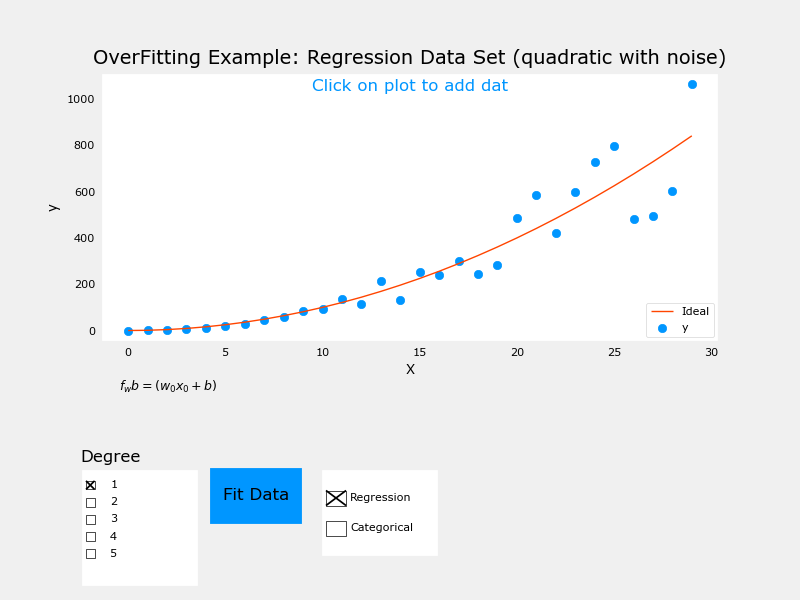

In [278]:
plt.close("all")
display(output) #debug purpose
ofit = overfit_example(False) #with regularisation=False

    In the plot above you can:

    switch between Regression and Categorization examples
    add data
    select the degree of the model
    fit the model to the data
    Here are some things you should try:

    Fit the data with degree = 1; Note 'underfitting'.
    Fit the data with degree = 6; Note 'overfitting'
    tune degree to get the 'best fit'
    add data:
    extreme examples can increase overfitting (assuming they are outliers).
    nominal examples can reduce overfitting
    switch between Regression and Categorical to try both examples.
    To reset the plot, re-run the cell. Click slowly to allow the plot to update before receiving the next click.

    Notes on implementations:

    the 'ideal' curves represent the generator model to which noise was added to achieve the data set
    'fit' does not use pure gradient descent to improve speed. These methods can be used on smaller data sets.

Output(outputs=({'output_type': 'stream', 'text': 'C:\\Users\\malla\\AppData\\Local\\Temp\\ipykernel_22820\\26…

Running Regularization


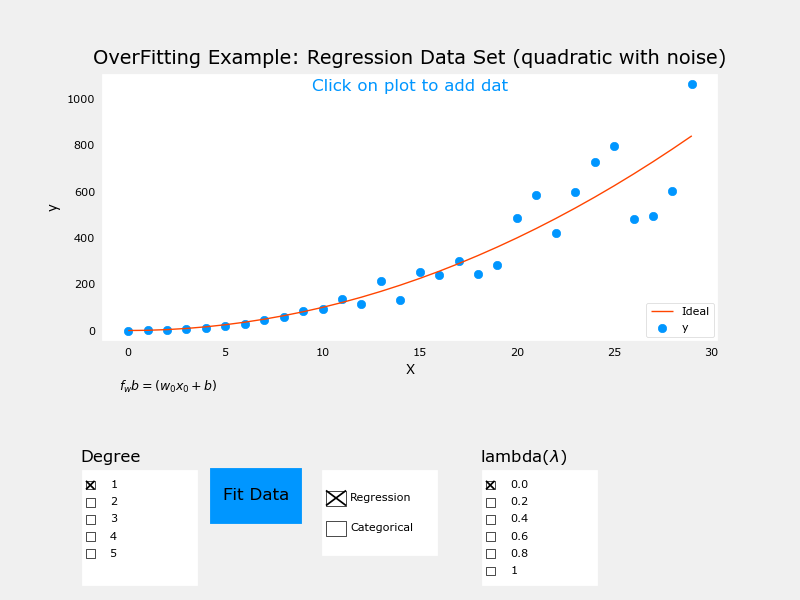

In [279]:
#with regularisation=True
plt.close("all")
display(output)
ofit = overfit_example(True)

    In the plot above, try out regularization. In particular:

    Categorical (logistic regression)
    set degree to 6, lambda to 0 (no regularization), fit the data
    now set lambda to 1 (increase regularization), fit the data, notice the difference.
    Regression (linear regression)
    try the same procedure.

In [ ]:
#chatgpt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.widgets import CheckButtons, Button

class GridSpecPlot:
    def __init__(self):
        self.fig = plt.figure(figsize=(10, 8))
        self.gs = GridSpec(5, 3, hspace=0.5)

        self.ax_scatter = self.fig.add_subplot(self.gs[:3, :])
        self.ax_scatter.scatter(np.random.rand(50), np.random.rand(50), c='b')
        self.ax_scatter.set_title('Scatter Plot')

        self.ax_simple = self.fig.add_subplot(self.gs[3, :])
        self.ax_simple.set_title('Simple Axis')

        self.ax_checkboxes = self.fig.add_subplot(self.gs[4, 0])
        self.check_labels = ['Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5']
        self.check_states = [True, False, True, False, True]
        self.checkboxes = CheckButtons(self.ax_checkboxes, self.check_labels, self.check_states)

        self.ax_fit_button = self.fig.add_subplot(self.gs[4, 1])
        self.fit_button = Button(self.ax_fit_button, 'Fit Data')

        self.ax_sample_checkboxes = self.fig.add_subplot(self.gs[4, 2])
        self.sample_check_labels = ['Sample 1', 'Sample 2']
        self.sample_check_states = [True, False]
        self.sample_checkboxes = CheckButtons(self.ax_sample_checkboxes, self.sample_check_labels, self.sample_check_states)

        self.fig.set_facecolor('skyblue')

        self.fit_button.on_clicked(self.fit_data)

    def fit_data(self, event):
        print("Fitting data...")

# Create an instance of the GridSpecPlot class and display the plot
grid_spec_plot = GridSpecPlot()
plt.show()
